# 🔍 **Análisis Exploratorio de datos de la Serie *Friends* (EDA)**

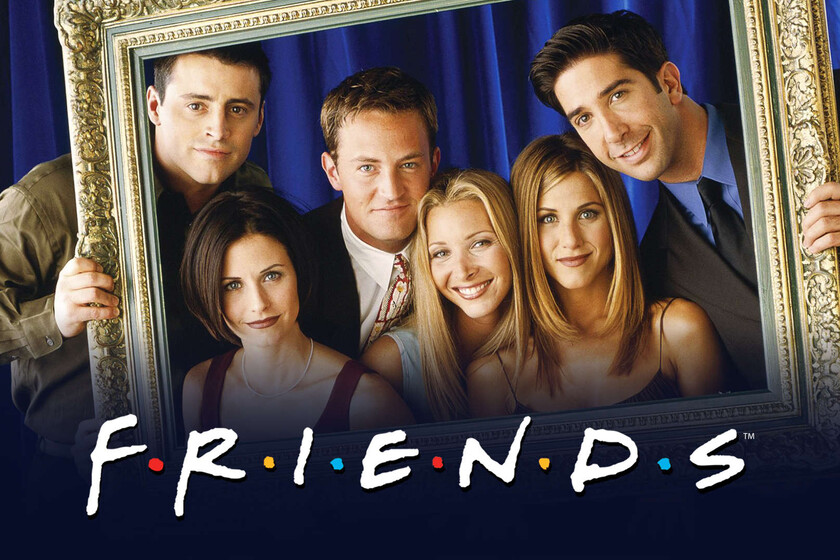

Una serie de 10 temporadas y mas de 200 capítulos, emitida entre 1994 y 2004, es una de las series más vistas a nivel mundial y a través de este EDA voy a resolver varias hipótesis sobre ella, basándome en el público, a través de votos y rating por episodio.

## 📑 **Índice**
   
1. 📂 Descripción del Dataset  
2. 🎯 Planteamiento de Hipótesis
3. 🔍 Preparación, Revisión y Limpieza de Datos   
4. 📊 Análisis, Resultados y Hallazgos  
5. 🧠 Conclusiones 

### 1. 📂 **Descripción del dataset:**

  🎥 Título del episodio.  
  🎥 Breve sinopsis de cada episodio.  
  🎥 Número de temporada del episodio (1-10).  
  🎥 Número de episodio dentro de cada temporada.  
  🎥 Duración de cada episodio en minutos (de 22 a 45).  
  🎥 Año de emisión de cada episodio (1994-2004).  
  🎥 Director de cada episodio.  
  🎥 Rating por episodio.  
  🎥 Total de votos de usuarios por episodio.  
  🎥 Indica si se trata de un episodio especial o no.

### 2. 🎯 **Planteamiento de Hipótesis**

#### **H1:** Los episodios más largos tienen mayor número de votos.

Comprobaremos a partir de los datos que tenemos, si efectivamente los episodios que más minutos duran, se llevan los mayores votos de los usuarios.

#### **H2:** Los episodios finales de cada temporada tienen un rating más alto que los primeros.

Veremos si el último episodio de cada temporada tiene un rating mayor que el primero de cada una de ellas.

#### **H3:** Las temporadas con mayor rating están en la mitad de la serie.

¿Son las temporadas centrales de la serie las mejores para la audiencia? Lo comprobaremos midiendo el rating por temporada.

#### **H4:** Los episodios dirigidos por Kevin Bright tienen mayor número de votos.

El director que más episodios dirigió de esta mítica serie, vamos a comprobar si son los más votados por los usuarios.

#### **H5:** Los episodios especiales tienen más rating

Los episodios divididos en varias partes, ¿gustan más? Vamos a ver si coincide que tienen más rating si se cumple esta característica.

### 3. 🔍 **Preparación, Revisión y Limpieza de Datos**

Importamos las diferentes librerías que vamos a necesitar.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset, que tenemos ubicado en la carpeta data, y lo convertimos en un Dataframe para empezar a trabajar con él.

In [16]:
df_friends = pd.read_csv("data/friends.csv")

Analizamos la estructura de nuestros datos.

In [17]:
df_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   episode_title        234 non-null    object 
 1   description          234 non-null    object 
 2   season               234 non-null    int64  
 3   episode              234 non-null    int64  
 4   duration_in_minutes  234 non-null    int64  
 5   year                 234 non-null    int64  
 6   director             234 non-null    object 
 7   rating               234 non-null    float64
 8   total_votes          234 non-null    int64  
 9   special_episode      234 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 18.4+ KB


### 4. 📊 **Análisis, Resultados y Hallazgos**

#### **H1:** Los episodios más largos tienen mayor número de votos.

Empezamos mirando el número máximo de votos totales.

In [18]:
df_friends["total_votes"].max()

np.int64(17032)

Ordenamos por votos y después por duración, de mayor a menor, para comprobar el resultado de la hipótesis.

In [19]:
df_friends.sort_values(["total_votes", "duration_in_minutes"], ascending=False)

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
233,The Last One,Phoebe races Ross to the airport in a bid to s...,10,17,45,2004,Kevin Bright,9.6,17032,1
110,The One Where Everybody Finds Out,When Phoebe finds out about Monica and Chandle...,5,14,22,1999,Michael Lembeck,9.7,13726,0
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
84,The One with the Embryos,Phoebe's uterus is examined for implantation o...,4,12,22,1998,Kevin Bright,9.4,9678,0
37,The One with the Prom Video,The gang watches a home video from the night o...,2,14,22,1996,James Burrows,9.3,8808,0
...,...,...,...,...,...,...,...,...,...,...
213,The One with the Soap Opera Party,Joey throws a cast party on the roof of his bu...,9,20,22,2003,Sheldon Epps,8.1,4276,0
223,The One with the Home Study,Monica and Chandler nervously prepare for a vi...,10,7,22,2003,Kevin Bright,8.1,4270,0
212,The One with Rachel's Dream,"Nervous about his upcoming romantic scenes, Jo...",9,19,22,2003,Terry Hughes,7.9,4267,0
214,The One with the Fertility Test,Joey comes to Ross for advice on dating Charli...,9,21,22,2003,Gary Halvorson,8.1,4239,0


Aunque el episodio más votado si que coincide ser el que más minutos tiene, si miramos el top 5, el resto de episodios son de 22 minutos, que es la duración normal de episodio.  
Por lo que se concluye que no es un requisito que los usuarios tienen en cuenta a la hora de votar.

In [62]:
df_friends[df_friends["duration_in_minutes"] == 30]

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
95,The One with Ross's Wedding,Phoebe tries to help Rachel deal with her feel...,4,23,30,1998,Kevin Bright,8.6,5480,1
96,The One with Ross's Wedding,Phoebe tries to warn the gang that Rachel is c...,4,24,30,1998,Kevin Bright,9.1,6807,1
135,The One That Could Have Been,When Rachel hears Barry and Mindy are getting ...,6,15,30,2000,Michael Lembeck,8.3,5106,1
136,The One That Could Have Been,The gang continue to think about how different...,6,16,30,2000,Michael Lembeck,8.3,4846,1
144,The One with the Proposal,Chandler's plan to propose to Monica at dinner...,6,24,30,2000,Kevin Bright,8.6,4955,1
145,The One with the Proposal,Chandler continues to pretend to hate the idea...,6,25,30,2000,Kevin Bright,9.2,6817,1


Para entender mejor el resultado hacemos una visualización de los episodios que duran 30 minutos.  
Esto nos deja ver que hay 6 episodios con esta duración a lo largo de la serie y que son episodios especiales de final de temporada o mid season finale.

Sacamos un DataFrame del principal solo con los datos que nos hacen falta, en este caso agrupamos por duración y sacamos la mediana de los votos, ya que hay muchos episodios con los mismos minutos de duración (22), para una mejor visualización.

In [41]:
df_h1 = df_friends.groupby("duration_in_minutes").median("total_votes")
df_h1

,season,episode,year,rating,total_votes,special_episode
duration_in_minutes,,,,,,
22,5.0,12.0,1999.0,8.2,5110.0,0.0
23,9.0,18.0,2003.0,8.5,4607.0,0.0
24,9.0,14.0,2003.0,8.0,4331.0,0.0
26,9.0,17.0,2003.0,8.3,4501.0,0.0
27,9.0,16.0,2003.0,8.0,4177.0,0.0
30,6.0,23.5,2000.0,8.6,5293.0,1.0
45,10.0,17.0,2004.0,9.6,17032.0,1.0


Visualización del resultado de la primera hipótesis:

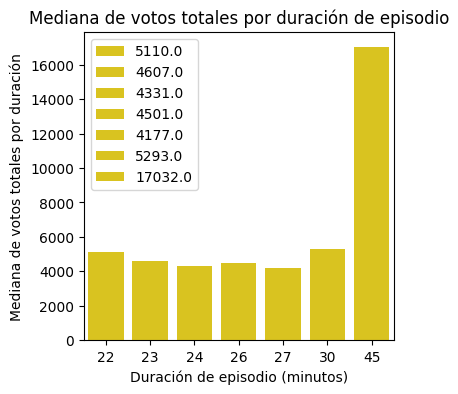

In [48]:
plt.figure(figsize=(4,4))
sns.barplot(data=df_h1, x=df_h1.index, y="total_votes", color="#F8DB01", label=df_h1["total_votes"])
plt.xlabel("Duración de episodio (minutos)")
plt.ylabel("Mediana de votos totales por duración")
plt.title("Mediana de votos totales por duración de episodio");

El gráfico representa la mediana de votos por minutos de duración.  
Se puede apreciar que esos episodios especiales de 30 minutos y el episodio final de 45, si que tienen mayor número de votos, pero no es vinculante para la hipótesis ya que no es 1 episodio como tal, si no que se trata de episodios dobles.  
Por lo que la conclusión final sobre esta hipótesis es que en este caso no tiene relación la duración del episodio con el número de votos. 

#### **H2:** Los episodios finales de cada temporada tienen un rating más alto que los primeros.

Sacamos un DataFrame nuevo con lo necesario para resolver la hipótesis, en este caso solo nos hace falta la temporada, el episodio y el raitng.

In [22]:
df_h2 = df_friends[["season", "episode", "rating"]]
df_h2.head(3)

,season,episode,rating
0,1,1,8.1
1,1,2,7.9
2,1,3,8.0


Agrupamos por temporada y nos quedamos solo con el primer dato de cada una para tener la información del primer episodio.  
Lo guardamos en una variable nueva.

In [23]:
primero = df_h2.groupby("season").head(1)
primero.head()

,season,episode,rating
0,1,1,8.1
24,2,1,8.4
48,3,1,8.3
73,4,1,8.9
97,5,1,8.8


Ahora hacemos lo mismo para quedarnos solo con el último dato de cada temporada.  
Lo guardamos en una variable nueva.

In [24]:
ultimo = df_h2.groupby("season").tail(1)
ultimo.head()

,season,episode,rating
23,1,24,8.7
47,2,24,8.1
72,3,25,8.7
96,4,24,9.1
120,5,24,9.0


Sobreescribimos el Dataframe que hemos creado para esta hipótesis solo los datos que son necesarios, concatenando los guardados en estas 2 nuevas variables para poder comprobar el resultado.

In [25]:
df_h2 = pd.concat([primero, ultimo]).sort_values(["season", "episode"])
df_h2.head(6)

,season,episode,rating
0,1,1,8.1
23,1,24,8.7
24,2,1,8.4
47,2,24,8.1
48,3,1,8.3
72,3,25,8.7


En este caso vemos que efectivamente, los últimos episodios tienen más rating que los primeros en 9 de 10 temporadas.

Visualización del resultado de la segunda hipótesis:

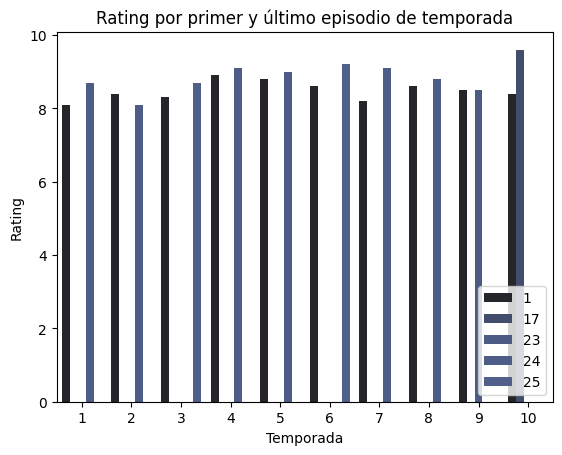

In [63]:
sns.barplot(data=df_h2, x="season", y="rating", hue="episode", palette="dark:#465B95")
plt.xlabel("Temporada")
plt.ylabel("Rating")
plt.title("Rating por primer y último episodio de temporada")
plt.legend(bbox_to_anchor=[1,0], loc="lower right");

Las barras azul oscuro, representan el primer episodio de temporada y las azules más claras el episodio final.  
Vemos que salvo en la segunda temporada, si que tienen un rating mayor los últimos episodios de cada temporada.  
Por lo que concluimos con que esta hipótesis si que se cumple y que el rating de final de temporada es más alto que el de inicio.

#### **H3:** Las temporadas con mayor rating están en la mitad de la serie.

Lo primero que hacemos es agrupar por temporada y sacar la suma del rating, ordenándolo de mayor a menor.

In [27]:
df_friends.groupby("season")["rating"].sum().sort_values(ascending=False)

season
6     207.9
3     206.3
5     202.4
4     199.8
8     198.8
2     198.8
7     197.9
1     195.3
9     186.5
10    144.2
Name: rating, dtype: float64

Creamos un Dataframe con los datos neceserarios para esta hipótesis, en este caso, temporada y la suma de los ratings. Se renomra la columna rating como rating total.

In [28]:
df_h3 = (df_friends.groupby("season")["rating"].sum().reset_index().rename(columns={"rating":"rating_total"}))
df_h3

,season,rating_total
0,1,195.3
1,2,198.8
2,3,206.3
3,4,199.8
4,5,202.4
5,6,207.9
6,7,197.9
7,8,198.8
8,9,186.5
9,10,144.2


Visualización del resultado de la tercera hipótesis:

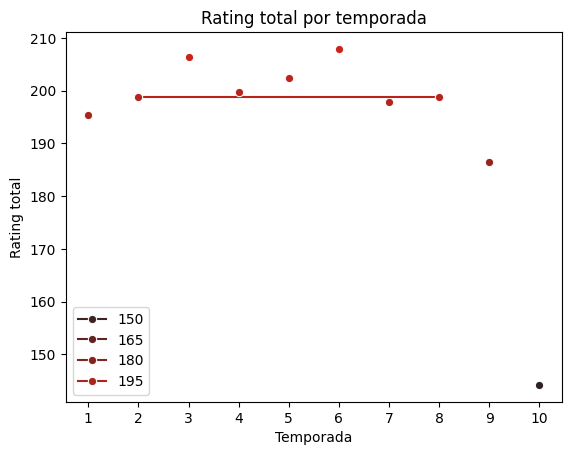

In [44]:
sns.lineplot(data=df_h3, x="season", y="rating_total", marker="o", hue="rating_total", palette="dark:#CC241B")
plt.title("Rating total por temporada")
plt.xticks(df_h3["season"])
plt.xlabel("Temporada")
plt.ylabel("Rating total")
plt.legend(loc="lower left")
plt.axis("tight");

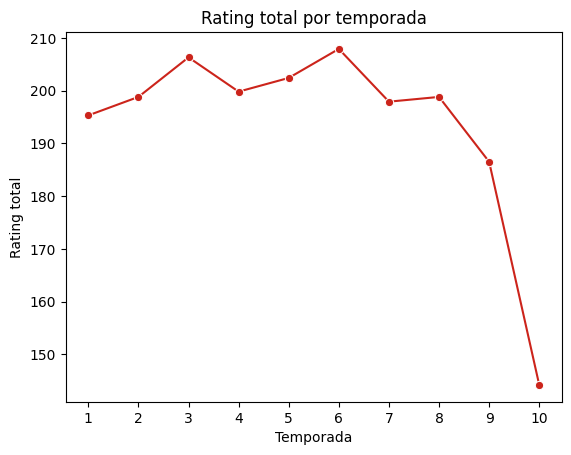

In [54]:
sns.lineplot(data=df_h3, x="season", y="rating_total", marker="o", color="#CC241B")
plt.title("Rating total por temporada")
plt.xticks(df_h3["season"])
plt.xlabel("Temporada")
plt.ylabel("Rating total")
plt.axis("tight");

En el gráfico se aprecia como el rating de la serie aumenta desde la primera temporada, llegando al punto más alto en la sexta, y que a partir de ahí baja el rating de una manera significativa.  
Sacamos la conclusión de que la serie empieza subiendo el rating a medida que avanza en temporadas, llegando a su punto mayor de rating sobre la mitad y para la última temporada tiene el rating más bajo, lo que nos puede indicar que probablemente sea uno de los motivos por los que deciden finalizar la serie.

#### **H4:** Los episodios dirigidos por Kevin Bright tienen mayor número de votos.

Partiendo de nuestro DataFrame original agrupamos por director, por un lado contamos los episodios que ha dirigido y, por el otro, sacamos la media de votos que han tenido por episodios dirigidos.

In [30]:
df_h4 = pd.merge(df_friends.groupby("director")["total_votes"].mean().reset_index(), 
                 df_friends.groupby("director")["episode"].count().reset_index()).sort_values("total_votes", ascending=False)
df_h4.head()

,director,total_votes,episode
10,James Burrows,7171.933333,15
2,Arlene Sanford,6859.000000,1
15,Pamela Fryman,6632.500000,2
0,Alan Myerson,6566.500000,2
26,Thomas Schlamme,6564.000000,2


Aunque podría parecer, debido al número de episodios que ha dirigido, que eran de los más votados, los datos nos demuestran que los que más votos tienen son los dirigidos por James Burrows que, dirigiendo tan solo 15 episodios, en realidad es uno de los nombres que más asocia la gente como director de esta serie.  
También podemos observar que Kevin Bright no está dentro de los 5 primeros con mejores votos en sus episodios dirigidos.

Visualización del resultado de la cuarta hipótesis:

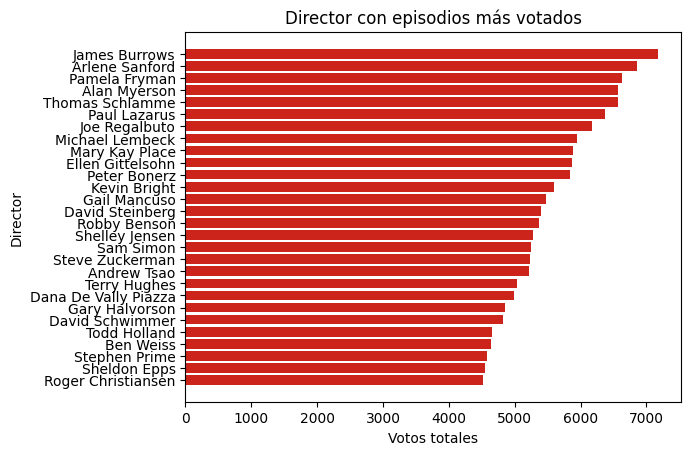

In [43]:
fig, ax = plt.subplots()
plt.barh(df_h4["director"], df_h4["total_votes"], color="#CC241B")
plt.title("Director con episodios más votados")
ax.set_xlabel("Votos totales")
ax.set_ylabel("Director")
ax.invert_yaxis();

Con este gráfico de columnas horizontales, apreciamos de manera rápida y visual, que el director con mayor número de votos en sus episodios dirigidos es James Burrows.
Como conclusión a esta cuarta hipótesis, queda claro que Kevin Bright no es el director con episodios más votados, y que se encuentra en la mitad del ranking.

#### **H5:** Los episodios especiales tienen más rating

Para saber si los episodios especiales tienen más rating que los normales, agrupamos los datos por episodio especial y después sacamos la media del rating.

In [32]:
df_h5 = (df_friends.groupby("special_episode")["rating"].mean().reset_index())
df_h5

,special_episode,rating
0,0,8.248387
1,1,8.705882


Podemos comprobar que de media tienen medio punto más de rating los episodios especiales.

Visualización del resultado de la quinta hipótesis:

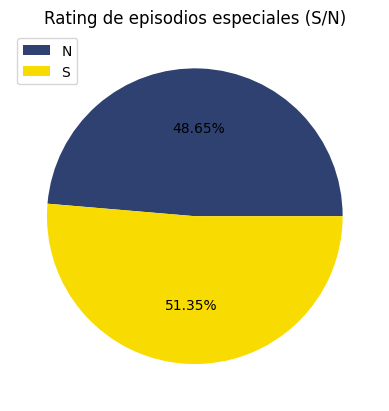

In [42]:
plt.pie(df_h5["rating"], autopct="%1.2f%%", colors=["#2E4170", "#F8DB01"])
plt.title("Rating de episodios especiales (S/N)")
plt.legend("NS", loc="upper left");

En el quinto y último gráfico mostramos los episodios especiales en color amarillo y los normales en color azul, viendo que por muy poco, si que tienen mayor rating de media, pero podemos concluir que no es algo significativo y que no está directamente relacionado. 

### 5. 🧠 **Conclusiones**

Después de analizar los datos y responder e ir respondiendo a las hipótesis que planteábamos, podemos concluir que:  
- No existe relación directa entre la duración de los episodios y los votos.
- Los episodios finales suelen tener un rating ligeramente superior.
- Las temporadas centrales concentran las mejores valoraciones.
- Algunos directores destacan por el alto promedio de votos en sus episodios, especialmente James Burrows.
- Los episodios especiales no presentan diferencias notables en la valoración promedio.